In [1]:


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(" Libraries imported successfully!")
print(" Ready to analyze Customer Churn!")


 Libraries imported successfully!
 Ready to analyze Customer Churn!


In [2]:
# Load the dataset
df = pd.read_csv('customer_churn_data.csv')

print(" DATASET LOADED SUCCESSFULLY!")
print(f" Total Records: {len(df):,}")
print(f" Total Columns: {len(df.columns)}")
print(f" Dataset Size: {df.memory_usage().sum() / 1024**2:.2f} MB")



 DATASET LOADED SUCCESSFULLY!
 Total Records: 10,000
 Total Columns: 18
 Dataset Size: 1.37 MB


In [3]:
# Display first 10 rows
print(" FIRST 10 ROWS OF DATA:\n")
print(df.head(10))


print("\n COLUMN NAMES:\n")
print(df.columns.tolist())


 FIRST 10 ROWS OF DATA:

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86        

In [5]:
# Data information
print(" DATASET INFORMATION:\n")
print(df.info())

print("\n DATA TYPES:\n")
print(df.dtypes.value_counts())


 DATASET INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-n

In [6]:
# Check missing values
print(" MISSING VALUES ANALYSIS:\n")


missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_percent.values
})

# Show only columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    print(f"\n Total Missing Values: {missing['Missing_Count'].sum():,}")
else:
    print(" NO MISSING VALUES! Data is clean!")


 MISSING VALUES ANALYSIS:

 NO MISSING VALUES! Data is clean!


In [7]:
#Check Target Variable

# Find the churn column (it might be named differently)
churn_column = None

# Common churn column names
possible_names = ['Churn', 'churn', 'Exited', 'exited', 'Attrition_Flag', 'Status']

for name in possible_names:
    if name in df.columns:
        churn_column = name
        break

if churn_column:
    print(f" Found Churn Column: '{churn_column}'\n")
   
    print("\n CHURN DISTRIBUTION:\n")
    print(df[churn_column].value_counts())
    print("\n CHURN PERCENTAGE:\n")
    print(df[churn_column].value_counts(normalize=True) * 100)
    
    # Calculate churn rate
    if df[churn_column].dtype == 'object':
        # If it's text like "Yes"/"No"
        churn_rate = (df[churn_column].value_counts(normalize=True).iloc[0]) * 100
    else:
        # If it's 1/0
        churn_rate = (df[churn_column].sum() / len(df)) * 100
    
    print(f"\n Churn Rate: {churn_rate:.2f}%")
else:
    print(" Could not find churn column!")
    print("\nAvailable columns:")
    print(df.columns.tolist())


 Found Churn Column: 'Exited'


 CHURN DISTRIBUTION:

Exited
0    7962
1    2038
Name: count, dtype: int64

 CHURN PERCENTAGE:

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

 Churn Rate: 20.38%


In [8]:
#STATISTICAL SUMMARY
# Statistical summary of numerical columns
print(" STATISTICAL SUMMARY OF NUMERICAL FEATURES:\n")

print(df.describe().T)


print("\n NUMERICAL COLUMNS:\n")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)
print(f"\nTotal Numerical Columns: {len(numerical_cols)}")


 STATISTICAL SUMMARY OF NUMERICAL FEATURES:

                      count          mean           std          min  \
RowNumber           10000.0  5.000500e+03   2886.895680         1.00   
CustomerId          10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore         10000.0  6.505288e+02     96.653299       350.00   
Age                 10000.0  3.892180e+01     10.487806        18.00   
Tenure              10000.0  5.012800e+00      2.892174         0.00   
Balance             10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts       10000.0  1.530200e+00      0.581654         1.00   
HasCrCard           10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember      10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary     10000.0  1.000902e+05  57510.492818        11.58   
Exited              10000.0  2.038000e-01      0.402842         0.00   
Complain            10000.0  2.044000e-01      0.403283         0.00   
Satisfaction Score 

In [9]:
#Categorical Summary

# Categorical columns analysis
print(" CATEGORICAL COLUMNS ANALYSIS:\n")


categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns: {categorical_cols}")
print(f"Total: {len(categorical_cols)}\n")

# Show unique values for each categorical column
for col in categorical_cols[:10]:  # First 10 to avoid too much output
    print(f"\n {col}:")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Values: {df[col].unique()[:10]}")  # Show first 10 values
    if df[col].nunique() <= 10:
        print(f"\n   Distribution:")
        print(df[col].value_counts())
   


 CATEGORICAL COLUMNS ANALYSIS:

Categorical Columns: ['Surname', 'Geography', 'Gender', 'Card Type']
Total: 4


 Surname:
   Unique values: 2932
   Values: ['Hargrave' 'Hill' 'Onio' 'Boni' 'Mitchell' 'Chu' 'Bartlett' 'Obinna' 'He'
 'H?']

 Geography:
   Unique values: 3
   Values: ['France' 'Spain' 'Germany']

   Distribution:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

 Gender:
   Unique values: 2
   Values: ['Female' 'Male']

   Distribution:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

 Card Type:
   Unique values: 4
   Values: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']

   Distribution:
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


Using 'Exited' as the churn column.
Visualization saved as 'churn_overview.png'


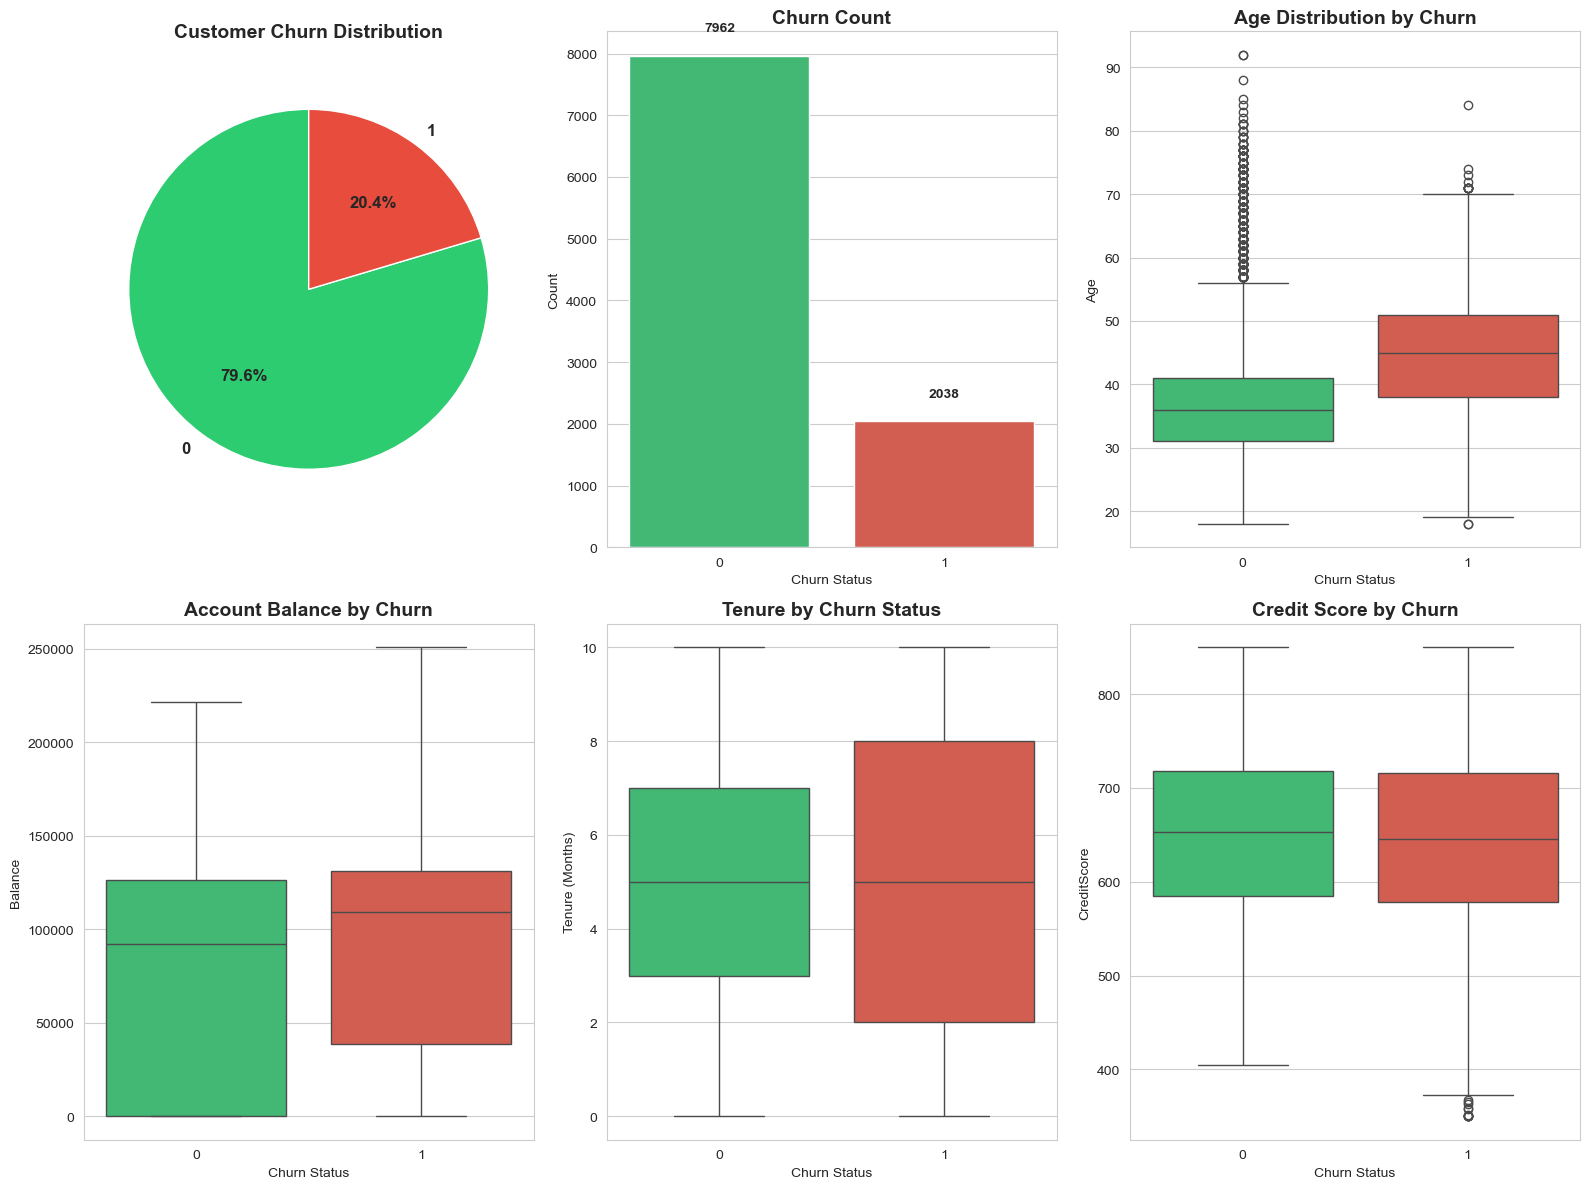

In [16]:
#VISUALIZE CHURN DISTRIBUTION
#Churn Overview

# Set visualization style
#sns.set_style("whitegrid")
#plt.figure(figsize=(16, 10))

# Use the churn column we found earlier (adjust name if needed)
# Common names: 'Churn', 'Exited', 'Attrition_Flag'
#churn_col = 'Churn'  # CHANGE THIS if your column has different name!

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Clean up column names (removes hidden spaces)
df.columns = df.columns.str.strip()

# 2. Identify the churn column automatically
possible_names = ['Churn', 'Exited', 'churn', 'Attrition_Flag', 'Churn Value']
churn_col = None

for name in possible_names:
    if name in df.columns:
        churn_col = name
        break

if churn_col is None:
    print("Error: Could not find a churn column. Please check your column names:")
    print(df.columns.tolist())
else:
    print(f"Using '{churn_col}' as the churn column.")

    # --- START OF INDENTED BLOCK ---
    # All code below this point must be indented because it is inside the 'else'
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 12))
   


    # 1. Churn Distribution - Pie Chart

    plt.subplot(2, 3, 1)

    churn_counts = df[churn_col].value_counts()

    colors = ['#2ecc71', '#e74c3c']

    plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 

            colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})

    plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold', pad=20)



    # 2. Churn Count - Bar Chart

    plt.subplot(2, 3, 2)

    sns.countplot(data=df, x=churn_col, palette=['#2ecc71', '#e74c3c'], hue=churn_col, legend=False)

    plt.title('Churn Count', fontsize=14, fontweight='bold')

    plt.xlabel('Churn Status')

    plt.ylabel('Count')

    for i, v in enumerate(churn_counts.values):

        plt.text(i, v + (max(churn_counts.values) * 0.05), str(v), ha='center', fontweight='bold')



    # 3. Age Distribution by Churn

    if 'Age' in df.columns:

        plt.subplot(2, 3, 3)

        sns.boxplot(data=df, x=churn_col, y='Age', palette=['#2ecc71', '#e74c3c'], hue=churn_col, legend=False)

        plt.title('Age Distribution by Churn', fontsize=14, fontweight='bold')

        plt.xlabel('Churn Status')



    # 4. Balance Distribution

    if 'Balance' in df.columns:

        plt.subplot(2, 3, 4)

        sns.boxplot(data=df, x=churn_col, y='Balance', palette=['#2ecc71', '#e74c3c'], hue=churn_col, legend=False)

        plt.title('Account Balance by Churn', fontsize=14, fontweight='bold')

        plt.xlabel('Churn Status')



    # 5. Tenure Distribution

    if 'Tenure' in df.columns:

        plt.subplot(2, 3, 5)

        sns.boxplot(data=df, x=churn_col, y='Tenure', palette=['#2ecc71', '#e74c3c'], hue=churn_col, legend=False)

        plt.title('Tenure by Churn Status', fontsize=14, fontweight='bold')

        plt.xlabel('Churn Status')

        plt.ylabel('Tenure (Months)')



    # 6. Credit Score

    if 'CreditScore' in df.columns:

        plt.subplot(2, 3, 6)

        sns.boxplot(data=df, x=churn_col, y='CreditScore', palette=['#2ecc71', '#e74c3c'], hue=churn_col, legend=False)

        plt.title('Credit Score by Churn', fontsize=14, fontweight='bold')

        plt.xlabel('Churn Status')



    plt.tight_layout()

    plt.savefig('churn_overview.png', dpi=300, bbox_inches='tight')

    print("Visualization saved as 'churn_overview.png'")

    plt.show()

--- DEMOGRAPHIC ANALYSIS ---

Analyzing Churn by: Geography
Exited             0          1
Geography                      
France     83.825289  16.174711
Germany    67.556796  32.443204
Spain      83.326605  16.673395


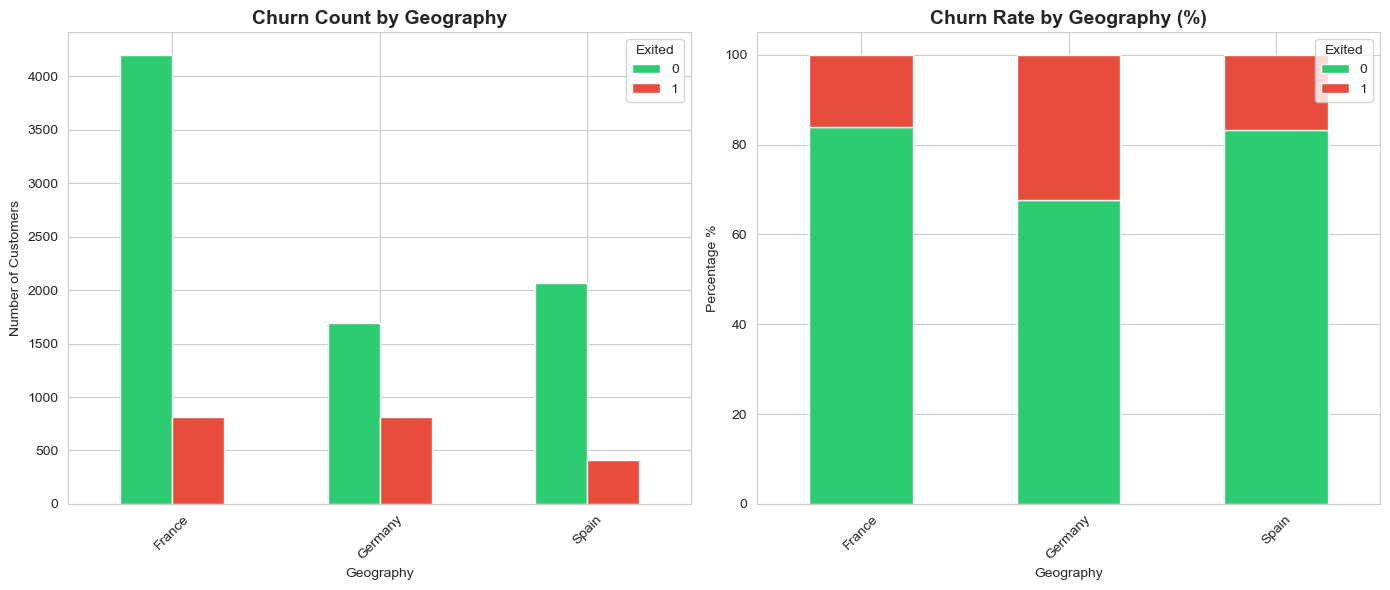


Analyzing Churn by: Gender
Exited          0          1
Gender                      
Female  74.928461  25.071539
Male    83.525747  16.474253


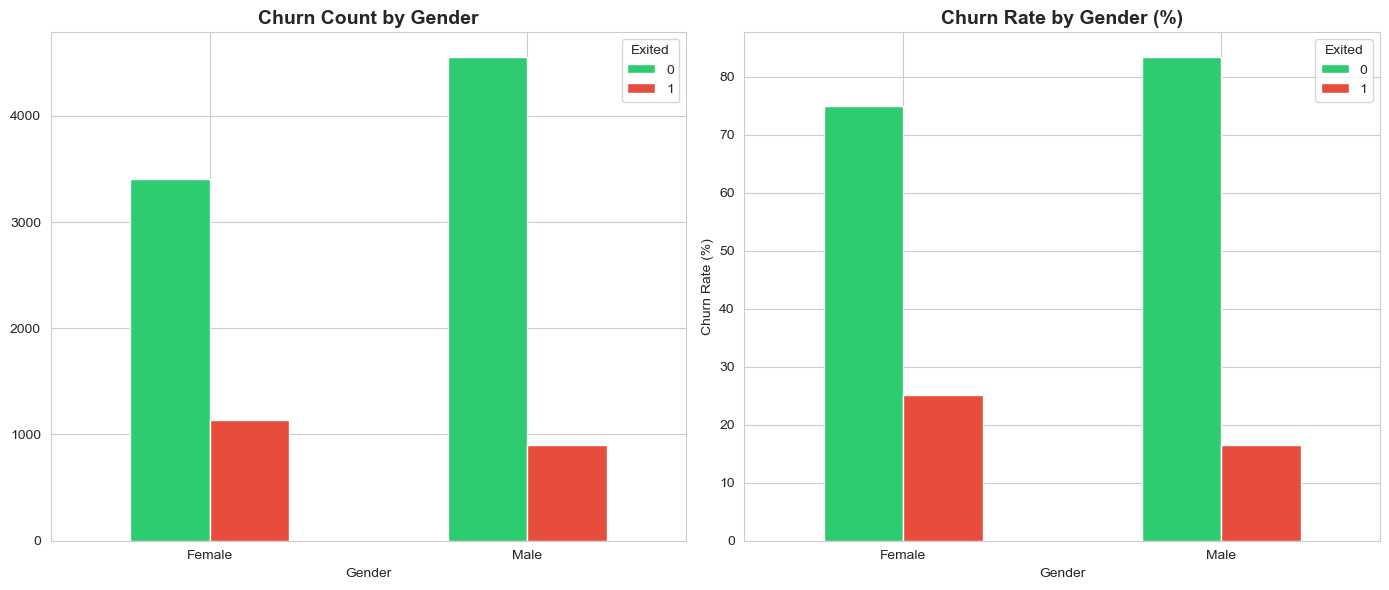

In [17]:
#DEMOGRAPHIC ANALYSIS
#Geography/Gender Analysis
# Adjust column names based on your dataset
# Common names: 'Geography', 'Country', 'Gender'

# Geography Analysis (if exists)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: SAFETY CHECK FOR COLUMN NAMES ---
df.columns = df.columns.str.strip()

# Find Gender and Geography column names automatically
geo_col = next((c for c in ['Geography', 'Country', 'Region'] if c in df.columns), None)
gender_col = next((c for c in ['Gender', 'Sex'] if c in df.columns), None)

print("--- DEMOGRAPHIC ANALYSIS ---\n")

# --- STEP 2: GEOGRAPHY ANALYSIS ---
if geo_col and churn_col:
    print(f"Analyzing Churn by: {geo_col}")
    geo_churn = pd.crosstab(df[geo_col], df[churn_col], normalize='index') * 100
    print(geo_churn)
    
    plt.figure(figsize=(14, 6))
    
    # Left Plot: Absolute Counts
    plt.subplot(1, 2, 1)
    # Use ax=plt.gca() to force pandas to use the current subplot
    pd.crosstab(df[geo_col], df[churn_col]).plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title(f'Churn Count by {geo_col}', fontsize=14, fontweight='bold')
    plt.xlabel(geo_col)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    
    # Right Plot: Percentages (Stacked)
    plt.subplot(1, 2, 2)
    geo_churn.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title(f'Churn Rate by {geo_col} (%)', fontsize=14, fontweight='bold')
    plt.xlabel(geo_col)
    plt.ylabel('Percentage %')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('geography_analysis.png', dpi=300)
    plt.show()

# --- STEP 3: GENDER ANALYSIS ---
if gender_col and churn_col:
    print(f"\nAnalyzing Churn by: {gender_col}")
    gender_churn = pd.crosstab(df[gender_col], df[churn_col], normalize='index') * 100
    print(gender_churn)
    
    plt.figure(figsize=(14, 6))
    
    # Left Plot: Absolute Counts
    plt.subplot(1, 2, 1)
    pd.crosstab(df[gender_col], df[churn_col]).plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title(f'Churn Count by {gender_col}', fontsize=14, fontweight='bold')
    plt.xlabel(gender_col)
    plt.xticks(rotation=0)
    
    # Right Plot: Percentages
    plt.subplot(1, 2, 2)
    gender_churn.plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title(f'Churn Rate by {gender_col} (%)', fontsize=14, fontweight='bold')
    plt.xlabel(gender_col)
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('gender_analysis.png', dpi=300)
    plt.show()


 PRODUCTS & SERVICES ANALYSIS


 CHURN BY NUMBER OF PRODUCTS:

Exited                 0           1
NumOfProducts                       
1              72.285602   27.714398
2              92.396514    7.603486
3              17.293233   82.706767
4               0.000000  100.000000

 Products visualization saved!


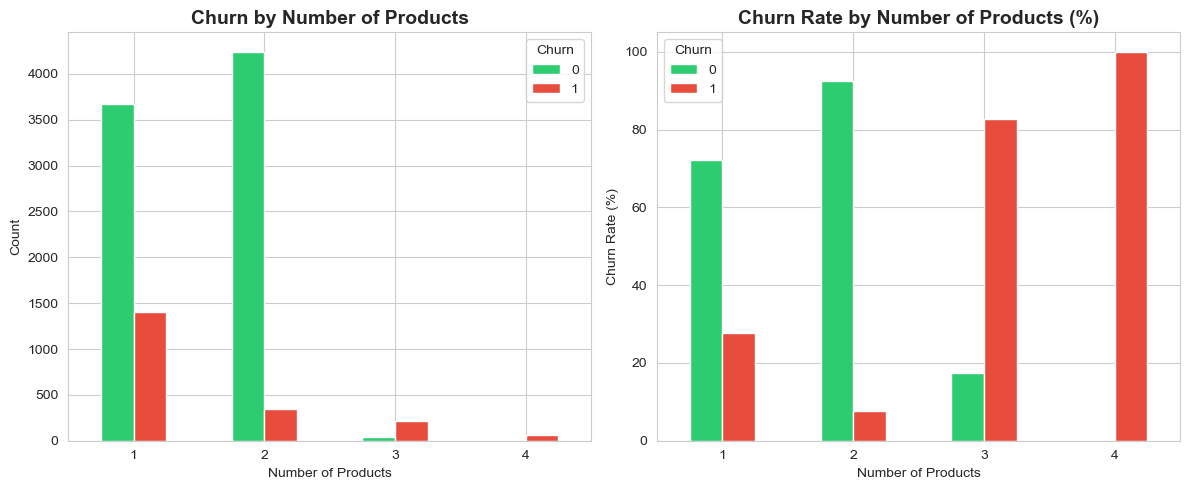


 CHURN BY CREDIT CARD STATUS:

Exited             0          1
HasCrCard                      
0          79.185059  20.814941
1          79.801559  20.198441

 CHURN BY ACTIVE MEMBER STATUS:

Exited                  0          1
IsActiveMember                      
0               73.128480  26.871520
1               85.730926  14.269074

 Active member visualization saved!


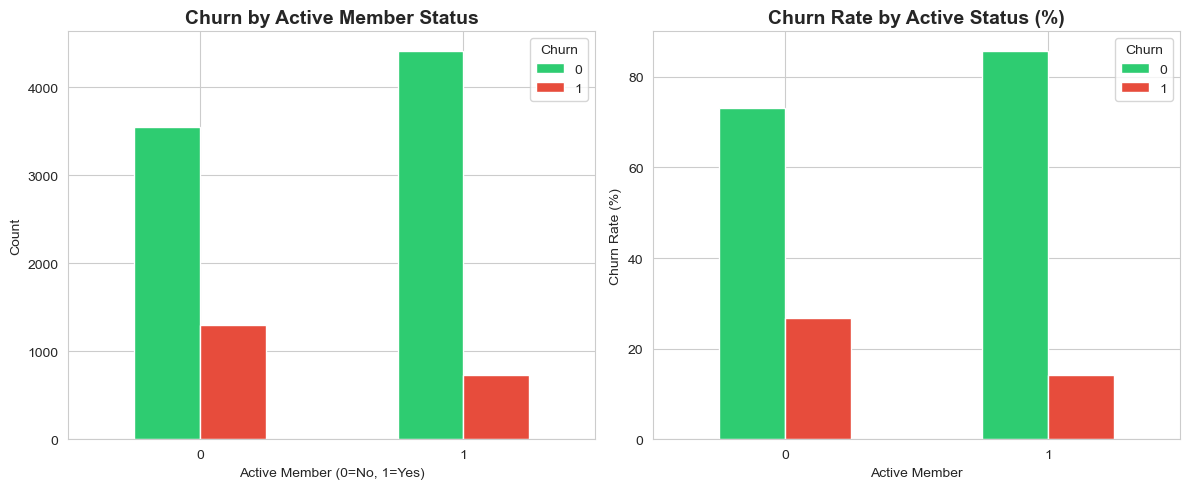

In [18]:
#PRODUCT & SERVICE ANALYSIS
#Products Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(" PRODUCTS & SERVICES ANALYSIS\n")


# --- 1. Number of Products Analysis ---
if 'NumOfProducts' in df.columns:
    print("\n CHURN BY NUMBER OF PRODUCTS:\n")
    products_churn = pd.crosstab(df['NumOfProducts'], df[churn_col], normalize='index') * 100
    print(products_churn)
    
    plt.figure(figsize=(12, 5))
    
    # Left Plot: Count
    plt.subplot(1, 2, 1)
    pd.crosstab(df['NumOfProducts'], df[churn_col]).plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title('Churn by Number of Products', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Products')
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.xticks(rotation=0)
    
    # Right Plot: Percentage
    plt.subplot(1, 2, 2)
    products_churn.plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title('Churn Rate by Number of Products (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Products')
    plt.ylabel('Churn Rate (%)')
    plt.legend(title='Churn')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('products_analysis.png', dpi=300, bbox_inches='tight')
    print("\n Products visualization saved!")
    plt.show()

# --- 2. Has Credit Card Status ---
if 'HasCrCard' in df.columns:
    print("\n CHURN BY CREDIT CARD STATUS:\n")
    card_churn = pd.crosstab(df['HasCrCard'], df[churn_col], normalize='index') * 100
    print(card_churn)

# --- 3. Active Member Analysis ---
if 'IsActiveMember' in df.columns:
    print("\n CHURN BY ACTIVE MEMBER STATUS:\n")
    active_churn = pd.crosstab(df['IsActiveMember'], df[churn_col], normalize='index') * 100
    print(active_churn)
    
    plt.figure(figsize=(12, 5))
    
    # Left Plot: Count
    plt.subplot(1, 2, 1)
    pd.crosstab(df['IsActiveMember'], df[churn_col]).plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title('Churn by Active Member Status', fontsize=14, fontweight='bold')
    plt.xlabel('Active Member (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.xticks(rotation=0)
    
    # Right Plot: Percentage
    plt.subplot(1, 2, 2)
    active_churn.plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title('Churn Rate by Active Status (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Active Member')
    plt.ylabel('Churn Rate (%)')
    plt.legend(title='Churn')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('active_member_analysis.png', dpi=300, bbox_inches='tight')
    print("\n Active member visualization saved!")
    plt.show()

 CORRELATION ANALYSIS

 Correlation heatmap saved!


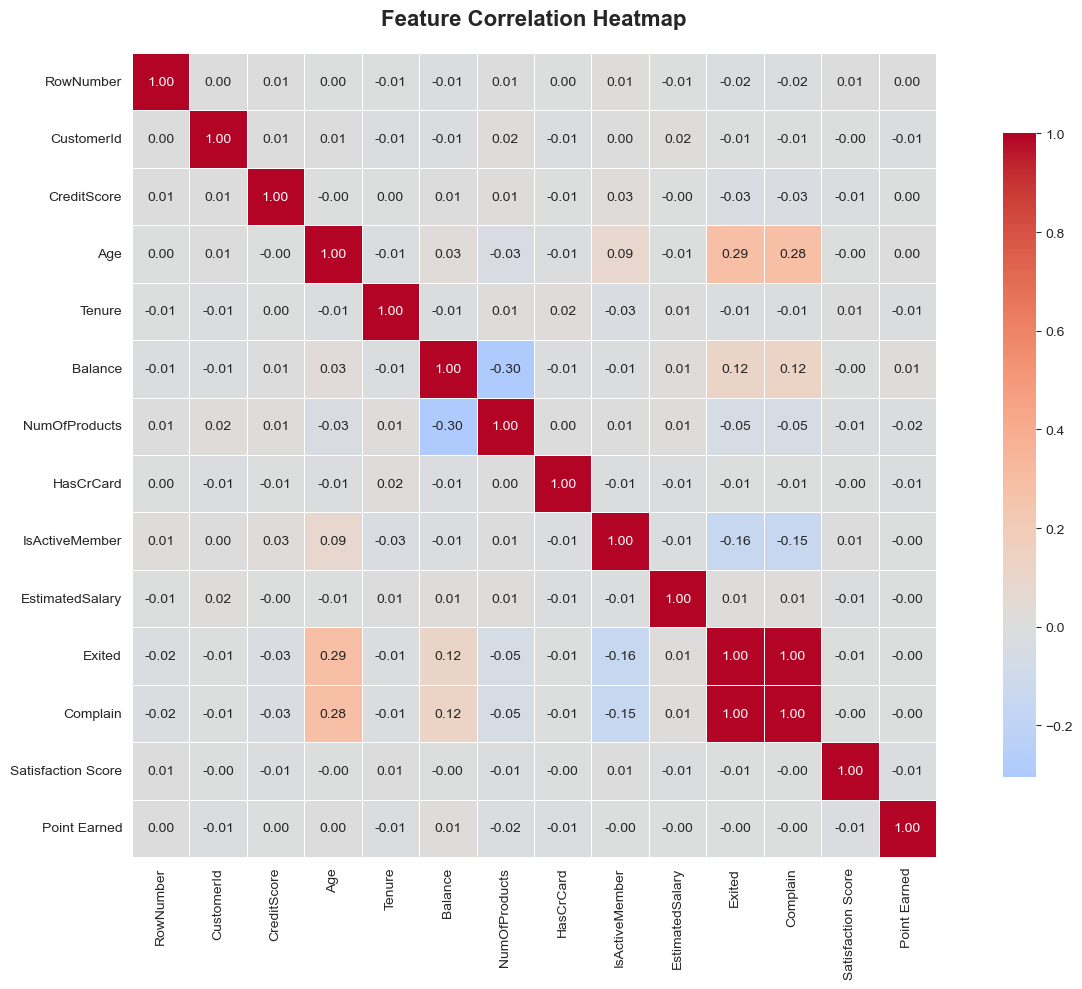


 CORRELATION WITH CHURN:

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64

 Churn correlation chart saved!


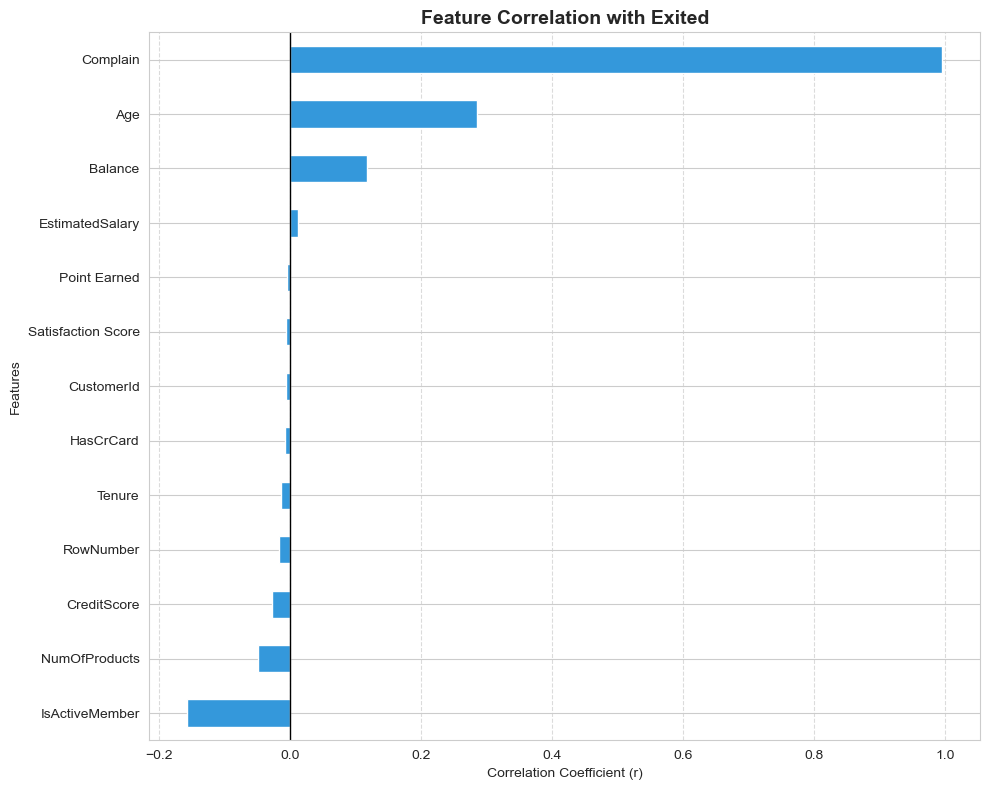

In [19]:
#CORRELATION ANALYSIS
#Correlation Heatmap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation Analysis
print(" CORRELATION ANALYSIS\n")


# --- STEP 1: PREPARE DATA ---
# Create a copy for correlation to avoid changing the original dataframe
corr_df = df.copy()

# Ensure churn is numeric so it appears in the correlation
if corr_df[churn_col].dtype == 'object':
    # This handles 'Yes'/'No', 'True'/'False', or already numeric strings
    corr_df['Churn_Numeric'] = corr_df[churn_col].apply(lambda x: 1 if str(x).lower() in ['yes', '1', 'true'] else 0)
    target_col = 'Churn_Numeric'
else:
    target_col = churn_col

# Select only numerical columns
numerical_df = corr_df.select_dtypes(include=[np.number])

# --- STEP 2: FULL HEATMAP ---
plt.figure(figsize=(14, 10))
correlation = numerical_df.corr()

# Create heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print(" Correlation heatmap saved!")
plt.show()

# --- STEP 3: CORRELATION WITH CHURN ---
print("\n CORRELATION WITH CHURN:\n")

# Calculate correlation of all features specifically with the target
churn_correlation = numerical_df.corr()[target_col].sort_values(ascending=False)
print(churn_correlation)

# Visualize Churn Correlation
plt.figure(figsize=(10, 8))
# Drop the target itself so we only see external features
churn_correlation.drop(target_col, errors='ignore').sort_values().plot(kind='barh', color='#3498db')

plt.title(f'Feature Correlation with {churn_col}', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient (r)')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('churn_correlation.png', dpi=300, bbox_inches='tight')
print("\n Churn correlation chart saved!")
plt.show()

In [21]:
# 1. Save the cleaned data to your local folder
df.to_csv('customer_churn_cleaned.csv', index=False)
print(" Cleaned data saved to your computer as 'customer_churn_cleaned.csv'")

# 2. Check if the images exist (no 'download' command needed in Jupyter)
import os

image_files = [
    'churn_overview.png',
    'geography_analysis.png',
    'gender_analysis.png',
    'products_analysis.png',
    'active_member_analysis.png',
    'correlation_heatmap.png',
    'churn_correlation.png'
]

print("\n--- FILE VERIFICATION ---")
for img in image_files:
    if os.path.exists(img):
        print(f" Found and saved: {img}")
    else:
        print(f" {img} was not found. (Did you skip a previous step?)")


print(f"\n All files are located in: {os.getcwd()}")
print("   ✓ customer_churn_cleaned.csv")
print("   ✓ All visualization images")

 Cleaned data saved to your computer as 'customer_churn_cleaned.csv'

--- FILE VERIFICATION ---
 Found and saved: churn_overview.png
 Found and saved: geography_analysis.png
 Found and saved: gender_analysis.png
 Found and saved: products_analysis.png
 Found and saved: active_member_analysis.png
 Found and saved: correlation_heatmap.png
 Found and saved: churn_correlation.png

 All files are located in: C:\Users\91950\project-customer-churn-prediction
   ✓ customer_churn_cleaned.csv
   ✓ All visualization images
